In [56]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10,5) #Adjust the configuration of the plots i will crate


In [32]:
#Read in the data 

df = pd.read_excel(r'movies.xlsx')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


In [33]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986


In [34]:
#Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
writer - 0.0%
year - 0.0%


In [35]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
writer       object
year          int64
dtype: object

In [41]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [38]:
#Drop any duplicates

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


In [39]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,Stephen King,1986
1,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,Jim Cash,1986
2,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,James Cameron,1986
3,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,John Hughes,1986
4,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,John Hughes,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,28000000,George Films,UK,Brad Furman,Biography,15425870,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,Ellen Sue Brown,2016
3096,27500000,Lionsgate,USA,Dan Mazer,Comedy,35537564,Dirty Grandpa,R,2016-01-22,102,6.0,Robert De Niro,John Phillips,2016
3097,70000000,RatPac-Dune Entertainment,USA,Nicholas Stoller,Animation,72655779,Storks,PG,2016-09-23,87,6.8,Andy Samberg,Nicholas Stoller,2016
3098,50000000,New Line Cinema,USA,Rawson Marshall Thurber,Action,127440871,Central Intelligence,PG-13,2016-06-17,107,6.3,Dwayne Johnson,Ike Barinholtz,2016


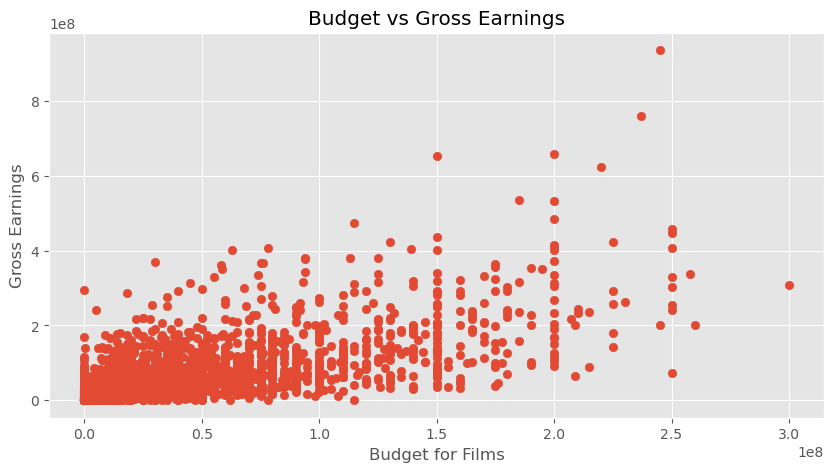

In [57]:
#Budget high Correlation
#Company high Correlation

#Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Films')
plt.ylabel('Gross Earnings')

plt.show()

In [42]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012


<Axes: xlabel='budget', ylabel='gross'>

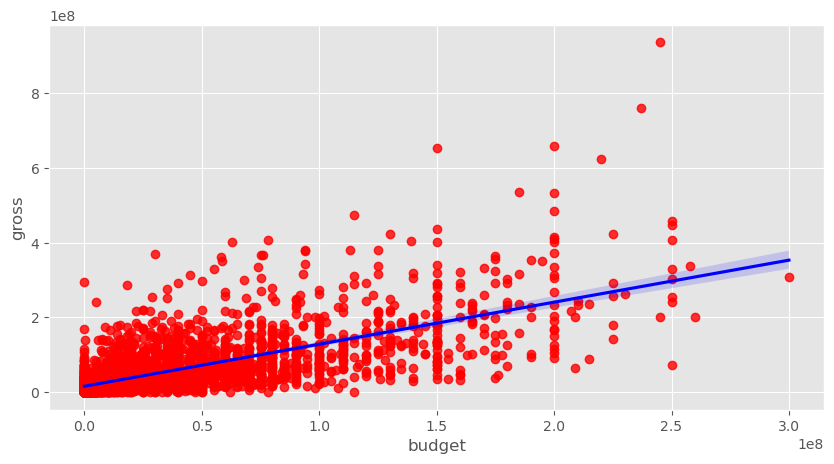

In [58]:
#Plot budget vs gross using seaborn
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [50]:
#Looking at Correlation

df.corr(method= 'pearson')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2912\1706856862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method= 'pearson')


,budget,gross,runtime,score,year
budget,1.000000,0.682588,0.309652,0.019061,0.374904
gross,0.682588,1.000000,0.238183,0.171825,0.246975
runtime,0.309652,0.238183,1.000000,0.386864,0.127864
score,0.019061,0.171825,0.386864,1.000000,0.109251
year,0.374904,0.246975,0.127864,0.109251,1.000000


C:\Users\Admin\AppData\Local\Temp\ipykernel_2912\2487514324.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


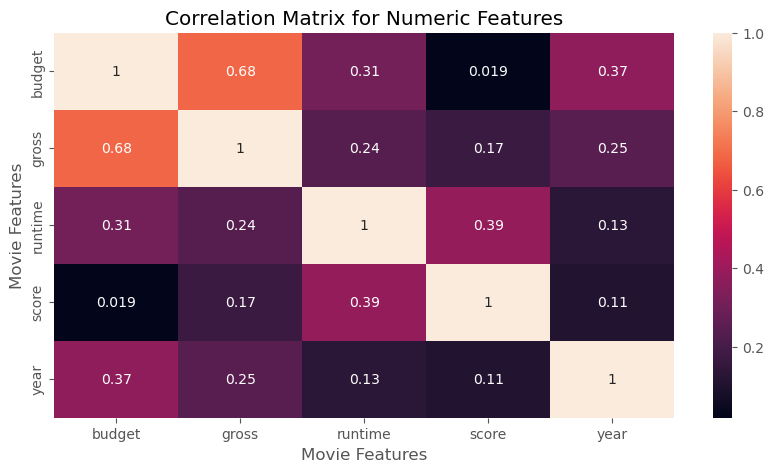

In [59]:
#High Correlation between budget and gross

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [61]:
#Looking at company
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,Lawrence Kasdan,2015
2302,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,James Cameron,2009
1100,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,James Cameron,1997
2916,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,Rick Jaffa,2015
2603,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,Joss Whedon,2012


In [62]:
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
2903,245000000,562,37,459,0,936662225,2103,5,1636,136,8.1,228,1082,2015
2302,237000000,813,36,469,0,760507625,214,5,1297,162,7.8,958,750,2009
1100,200000000,813,37,469,6,658672302,2803,5,643,194,7.8,682,750,1997
2916,150000000,821,37,204,0,652270625,1222,5,1606,124,7.0,196,1516,2015
2603,220000000,583,37,644,0,623357910,2229,5,1431,143,8.1,920,989,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,0,868,9,691,6,5000,0,6,1591,92,6.7,718,77,2014
1074,0,116,9,860,5,4440,1766,2,574,105,7.4,654,833,1996
2311,47000000,0,3,464,6,3600,1516,6,1511,141,7.9,484,746,2009
1466,5000000,257,5,574,6,2554,806,7,826,108,6.8,340,1010,2000


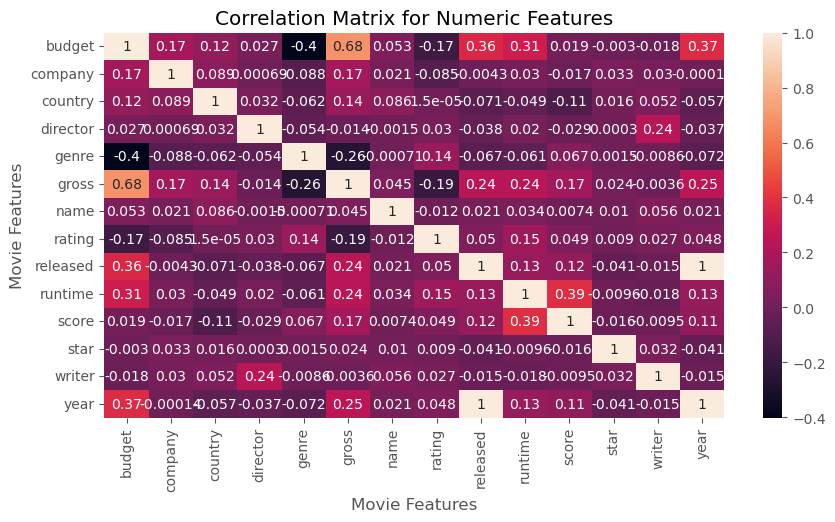

In [64]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [65]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,writer,year
budget,1.000000,0.167315,0.118863,0.026781,-0.401052,0.682588,0.052891,-0.171070,0.364692,0.309652,0.019061,-0.003049,-0.017760,0.374904
company,0.167315,1.000000,0.089416,0.000693,-0.087806,0.166076,0.020931,-0.084802,-0.004308,0.030240,-0.017452,0.033148,0.029712,-0.000143
country,0.118863,0.089416,1.000000,0.032402,-0.062478,0.138064,0.086466,0.000015,-0.070949,-0.049398,-0.113568,0.016349,0.052246,-0.057044
director,0.026781,0.000693,0.032402,1.000000,-0.054141,-0.014069,-0.001513,0.030037,-0.038044,0.020426,-0.028594,0.000301,0.235799,-0.037102
genre,-0.401052,-0.087806,-0.062478,-0.054141,1.000000,-0.263051,-0.000705,0.136055,-0.066747,-0.061327,0.067234,0.001537,-0.008581,-0.072299
gross,0.682588,0.166076,0.138064,-0.014069,-0.263051,1.000000,0.044952,-0.191666,0.237259,0.238183,0.171825,0.024435,-0.003571,0.246975
name,0.052891,0.020931,0.086466,-0.001513,-0.000705,0.044952,1.000000,-0.012356,0.021452,0.034482,0.007438,0.010346,0.056367,0.021199
rating,-0.171070,-0.084802,0.000015,0.030037,0.136055,-0.191666,-0.012356,1.000000,0.049572,0.153396,0.048781,0.009003,0.027008,0.048356
released,0.364692,-0.004308,-0.070949,-0.038044,-0.066747,0.237259,0.021452,0.049572,1.000000,0.133199,0.120882,-0.040605,-0.015324,0.996869
runtime,0.309652,0.030240,-0.049398,0.020426,-0.061327,0.238183,0.034482,0.153396,0.133199,1.000000,0.386864,-0.009577,-0.018333,0.127864


In [66]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs


budget  budget      1.000000
        company     0.167315
        country     0.118863
        director    0.026781
        genre      -0.401052
                      ...   
year    runtime     0.127864
        score       0.109251
        star       -0.040672
        writer     -0.014948
        year        1.000000
Length: 196, dtype: float64

In [68]:
sorted_pair = corr_pairs.sort_values()
sorted_pair

budget    genre      -0.401052
genre     budget     -0.401052
gross     genre      -0.263051
genre     gross      -0.263051
gross     rating     -0.191666
                        ...   
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
Length: 196, dtype: float64

In [71]:
high_corr = sorted_pair[(sorted_pair) > 0.5]
high_corr

budget    gross       0.682588
gross     budget      0.682588
released  year        0.996869
year      released    0.996869
budget    budget      1.000000
star      star        1.000000
score     score       1.000000
runtime   runtime     1.000000
released  released    1.000000
rating    rating      1.000000
name      name        1.000000
gross     gross       1.000000
genre     genre       1.000000
director  director    1.000000
country   country     1.000000
company   company     1.000000
writer    writer      1.000000
year      year        1.000000
dtype: float64